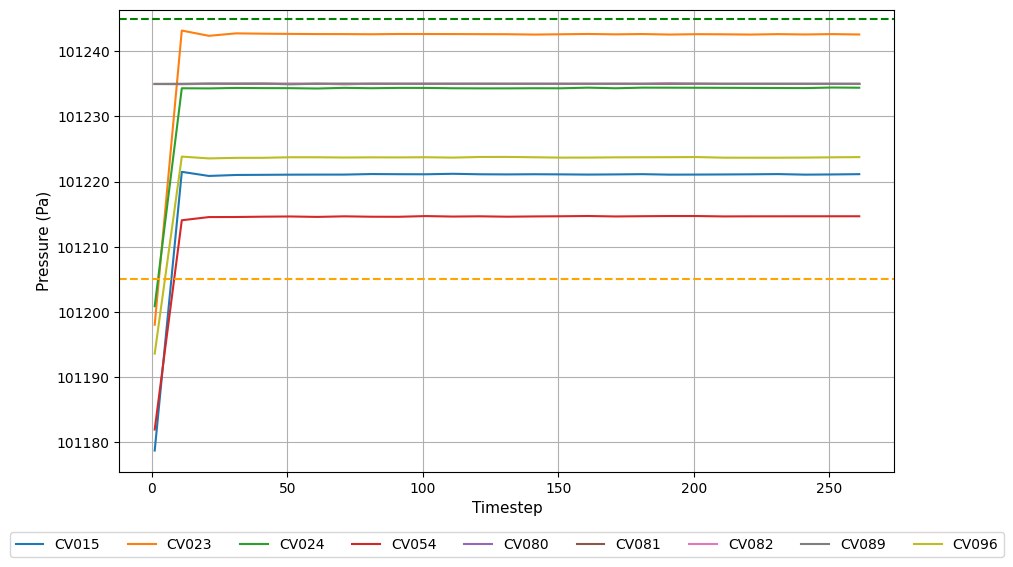

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# cvs = ['CV001', 'CV006', 'CV011', 'CV026', 'CV083', 'CV086']
cvs = ['CV015', 'CV023', 'CV024', 'CV054', 'CV080', 'CV081', 'CV082', 'CV089',  'CV096']

def read_data(filename, columns=None):
    if columns is None:
        columns = ['Time'] + cvs
    df = pd.read_csv(filename, delim_whitespace=True, header=None, names=columns)
    return df

filename = 'melgym/out/td3-lr001-b2/PRESSURES.DAT'

columns_to_show = cvs

df = read_data(filename)

time = df['Time'].values
pressures = df[columns_to_show].values

plt.figure(figsize=(10, 6))

for i, col in enumerate(columns_to_show):
    plt.plot(time, pressures[:, i], label=col)

color_map = {
    'C1': 'blue',
    'C2': 'green',
    'C3': 'orange',
    'C4': 'red'
}

limits_lines = {
    'C2': 101245,
    'C3': 101205
}

for text, value in limits_lines.items():
    prefix = text[:2]
    color = color_map.get(prefix, 'black')
    plt.axhline(y=value, linestyle='--', color=color)
    # plt.text(time[-1], value, text, fontsize=8, va='center', ha='left', backgroundcolor='white')

plt.xlabel('Timestep', fontsize=11)
plt.ylabel('Pressure (Pa)', fontsize=11)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=len(columns_to_show))
plt.grid(True)

plt.savefig('pressures_b2_plot.png', dpi=300, bbox_inches='tight')

plt.show()
